In [31]:
from lazypredict.Supervised import LazyRegressor
import pandas as pd
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np
from sklearn.preprocessing import (LabelEncoder, StandardScaler, 
                                   PowerTransformer, QuantileTransformer, 
                                   OrdinalEncoder, OneHotEncoder)
from sklearn.metrics import *
from sklearn.model_selection import (cross_val_score, cross_validate, 
                                     GridSearchCV, KFold, 
                                     RandomizedSearchCV, train_test_split,
                                     learning_curve, LearningCurveDisplay)
from sklearn.utils.estimator_checks import check_estimator
import matplotlib.pyplot as plt
import pickle
import shap
import seaborn as sns


# Pruebas con los datos sin transformar

Como nota, me apunto también una idea, que es transformar los datos con el quantile transformer, que manda los datos a una normal, y los transormadores son la hostia porque se pueden deshacer y au

In [9]:
data = pd.read_csv("data_model_trim.csv")

y = data.Ncasos_lead
X = data.drop(["Ncasos_lead", "Mun"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state =123)

In [3]:
data

,Mun,Ncasos_lead,Ncasos_lagroll_15,Ncasos_lagroll_30,nHab,caudal,lluvia,sars_loess,sars_loess_15,sars_loess_30,Month
0,BARCELONA,2438,1096.00,737.75,1664182,317575.00,0.30,35205.83,49926.86,48563.41,7
1,BARCELONA,2213,1868.50,1219.25,1664182,324759.00,0.00,64647.89,77625.60,75671.23,7
2,BARCELONA,1874,2388.00,1742.00,1664182,312062.00,0.00,90603.30,101415.60,99300.39,7
3,BARCELONA,1964,2325.50,2097.00,1664182,331372.00,9.60,112227.90,120975.19,121038.07,8
4,BARCELONA,2077,2043.50,2215.75,1664182,281022.00,0.00,129722.48,140660.54,139518.54,8
...,...,...,...,...,...,...,...,...,...,...,...
5492,VILA-SECA,3,6.00,9.25,22522,33019.00,0.00,38381.00,20415.50,303164.00,9
5493,VILA-SECA,2,6.00,6.00,22522,32518.00,0.00,2450.00,586929.50,436924.50,9
5494,VILA-SECA,40,72.00,52.00,22681,43255.70,0.00,1171409.00,853433.50,524086.25,6
5495,VILA-SECA,21,54.50,63.25,22681,38313.00,0.00,387028.00,352211.00,480995.25,7


In [11]:
lazy_reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric = None)

models, predictions = lazy_reg.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 42/42 [17:03<00:00, 24.36s/it] 


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.84,0.84,251.53,0.54
XGBRegressor,0.74,0.74,320.00,0.26
LGBMRegressor,0.67,0.67,358.63,0.08
HistGradientBoostingRegressor,0.65,0.65,370.47,0.21
KNeighborsRegressor,0.61,0.62,389.25,0.03
RandomForestRegressor,0.55,0.55,419.13,1.36
MLPRegressor,0.55,0.55,421.14,1.55
TransformedTargetRegressor,0.54,0.54,424.13,0.01
LinearRegression,0.54,0.54,424.13,0.01


Por lo que parece, del tema modelos el mejor es el lightgb, o light gradient boosting, el hermano menor del xgb (lo intenté usar en R y overfiteó en seguida a los datos de entrenamiento, siento que el puto xgb no consigue generalizar una mierda si no tiene millones de datos). Me da a mi que voy a probar primero ese, aunque luego retocaré los datos o algo y también veré qué modelos son mejores en estos (demasiada faena sinceramente).

In [8]:
data.describe()

,Ncasos_lead,Ncasos_lagroll_15,Ncasos_lagroll_30,nHab,caudal,lluvia,sars_loess,sars_loess_15,sars_loess_30
count,5497.00,5497.00,5497.00,5497.00,5497.00,5497.00,5497.00,5497.00,5497.00
mean,223.66,222.75,223.21,72769.75,49279.71,2.58,462346.00,463835.57,461885.27
std,1047.77,988.35,946.88,210370.15,88085.99,54.31,937950.80,922605.57,871948.75
min,1.00,1.00,1.00,2256.00,17.38,0.00,0.00,-0.00,-0.00
25%,22.00,22.50,23.75,15312.00,11912.00,0.00,31979.55,35140.97,39353.23
50%,52.00,53.50,54.25,26965.00,21408.00,0.00,108773.07,114382.44,118270.28
75%,136.00,140.50,142.25,57217.00,45468.00,0.00,490138.82,511339.07,514149.67
max,45832.00,44614.00,33371.00,1664182.00,591982.00,1669.00,16213607.61,16016724.23,14343365.24


In [4]:
# Check for missing values
missing_values = data.isnull().sum()

missing_values

Mun                  0
Ncasos_lead          0
Ncasos_lagroll_15    0
Ncasos_lagroll_30    0
nHab                 0
caudal               0
lluvia               0
sars_loess           0
sars_loess_15        0
sars_loess_30        0
Month                0
dtype: int64

In [10]:
data.select_dtypes(include='number').columns

Index(['Ncasos_lead', 'Ncasos_lagroll_15', 'Ncasos_lagroll_30', 'nHab',
       'caudal', 'lluvia', 'sars_loess', 'sars_loess_15', 'sars_loess_30'],
      dtype='object')

In [26]:
list(data.select_dtypes(include='number').columns) # Esto supongo que lo hice por si quería transformar algo

['Ncasos_lead',
 'Ncasos_lagroll_15',
 'Ncasos_lagroll_30',
 'nHab',
 'caudal',
 'lluvia',
 'sars_loess',
 'sars_loess_15',
 'sars_loess_30']

In [5]:
data

,Mun,Ncasos_lead,Ncasos_lagroll_15,Ncasos_lagroll_30,nHab,caudal,lluvia,sars_loess,sars_loess_15,sars_loess_30,Month
0,BARCELONA,2438,1096.00,737.75,1664182,317575.00,0.30,35205.83,49926.86,48563.41,7
1,BARCELONA,2213,1868.50,1219.25,1664182,324759.00,0.00,64647.89,77625.60,75671.23,7
2,BARCELONA,1874,2388.00,1742.00,1664182,312062.00,0.00,90603.30,101415.60,99300.39,7
3,BARCELONA,1964,2325.50,2097.00,1664182,331372.00,9.60,112227.90,120975.19,121038.07,8
4,BARCELONA,2077,2043.50,2215.75,1664182,281022.00,0.00,129722.48,140660.54,139518.54,8
...,...,...,...,...,...,...,...,...,...,...,...
5492,VILA-SECA,3,6.00,9.25,22522,33019.00,0.00,38381.00,20415.50,303164.00,9
5493,VILA-SECA,2,6.00,6.00,22522,32518.00,0.00,2450.00,586929.50,436924.50,9
5494,VILA-SECA,40,72.00,52.00,22681,43255.70,0.00,1171409.00,853433.50,524086.25,6
5495,VILA-SECA,21,54.50,63.25,22681,38313.00,0.00,387028.00,352211.00,480995.25,7


In [10]:
# quiero los meses como categóricos
nmeses = [1,2,3,4,5,6,7,8,9,10,11,12]
meses = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
m_dict = {x:y for x,y in zip(nmeses,meses)}
data.replace({"Month":m_dict}, inplace = True)
data_model = data.copy()

In [11]:
month_encoder = OrdinalEncoder(categories=[meses])
months = data[['Month']]
months_encoded = month_encoder.fit_transform(months)

In [12]:
data_model['Month'] = months_encoded
data_model.drop(['Mun'], axis = 1, inplace = True)

In [13]:
data_model

,Ncasos_lead,Ncasos_lagroll_15,Ncasos_lagroll_30,nHab,caudal,lluvia,sars_loess,sars_loess_15,sars_loess_30,Month
0,2438,1096.00,737.75,1664182,317575.00,0.30,35205.83,49926.86,48563.41,6.00
1,2213,1868.50,1219.25,1664182,324759.00,0.00,64647.89,77625.60,75671.23,6.00
2,1874,2388.00,1742.00,1664182,312062.00,0.00,90603.30,101415.60,99300.39,6.00
3,1964,2325.50,2097.00,1664182,331372.00,9.60,112227.90,120975.19,121038.07,7.00
4,2077,2043.50,2215.75,1664182,281022.00,0.00,129722.48,140660.54,139518.54,7.00
...,...,...,...,...,...,...,...,...,...,...
5492,3,6.00,9.25,22522,33019.00,0.00,38381.00,20415.50,303164.00,8.00
5493,2,6.00,6.00,22522,32518.00,0.00,2450.00,586929.50,436924.50,8.00
5494,40,72.00,52.00,22681,43255.70,0.00,1171409.00,853433.50,524086.25,5.00
5495,21,54.50,63.25,22681,38313.00,0.00,387028.00,352211.00,480995.25,6.00


Quiero hacer primero la prueba con las variables sin transformar, tal y como me ha dado antes el lazy predict. Debería llegar a hacer la prueba con los datos transformados también y luego hacer el fine tuning.

In [8]:
from sklearn.ensemble import ExtraTreesRegressor
ETR = ExtraTreesRegressor()
X = data_model.drop('Ncasos_lead', axis = 1)
y = data_model[['Ncasos_lead']]
kfold = KFold(n_splits=5, shuffle=True, random_state=1234)
scores = cross_validate(ETR,
                        X, y,
                        cv = kfold,
                        return_estimator = True,
                        scoring = ['r2', 'neg_mean_absolute_error'])



In [9]:
pd.DataFrame(scores)

,fit_time,score_time,estimator,test_r2,test_neg_mean_absolute_error
0,0.58,0.02,"(ExtraTreeRegressor(random_state=752223648), E...",0.77,-91.54
1,0.58,0.02,"(ExtraTreeRegressor(random_state=1991398739), ...",0.86,-77.33
2,0.58,0.02,"(ExtraTreeRegressor(random_state=1526231928), ...",-2.31,-136.22
3,0.58,0.02,"(ExtraTreeRegressor(random_state=2019397922), ...",0.77,-87.14
4,0.57,0.02,"(ExtraTreeRegressor(random_state=72105275), Ex...",0.41,-138.61


Existen fraccionados del modelo que no funcionan en absoluto. Por algún motivo la $R^2$ es bastante malucha. Vamos a probar el LGBM. 
Aunque antes voy a probar también el random forest por si.

In [51]:
from sklearn.ensemble import RandomForestRegressor
ETR = RandomForestRegressor()
# X = data_model.drop('Ncasos_lead', axis = 1)
# y = data_model[['Ncasos_lead']]
kfold = KFold(n_splits=5, shuffle=True, random_state=1234)
scores = cross_validate(ETR,
                        X, y,
                        cv = kfold,
                        return_estimator = True,
                        scoring = ['r2', 'neg_mean_absolute_error'])
pd.DataFrame(scores)

,fit_time,score_time,estimator,test_r2,test_neg_mean_absolute_error
0,1.90,0.02,"(DecisionTreeRegressor(max_features=1.0, rando...",0.61,-111.25
1,1.91,0.02,"(DecisionTreeRegressor(max_features=1.0, rando...",0.71,-89.67
2,1.90,0.02,"(DecisionTreeRegressor(max_features=1.0, rando...",-0.90,-127.23
3,1.86,0.02,"(DecisionTreeRegressor(max_features=1.0, rando...",0.46,-112.98
4,1.83,0.02,"(DecisionTreeRegressor(max_features=1.0, rando...",0.33,-151.50


Le ocurre exactamente igual y funciona algo peor.

In [8]:
from lightgbm import LGBMRegressor 
LGBM = LGBMRegressor()
X = data_model.drop('Ncasos_lead', axis = 1)
y = data_model[['Ncasos_lead']]
kfold = KFold(n_splits=5, shuffle=True, random_state=1234)
scores = cross_validate(LGBM,
                        X, y,
                        cv = kfold,
                        return_estimator = True,
                        scoring = ['r2', 'neg_mean_absolute_error'])
pd.DataFrame(scores)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1827
[LightGBM] [Info] Number of data points in the train set: 4397, number of used features: 9
[LightGBM] [Info] Start training from score 222.135547
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1834
[LightGBM] [Info] Number of data points in the train set: 4397, number of used features: 9
[LightGBM] [Info] Start training from score 227.116443
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1831
[LightGBM] [Info] Number of data points in the train set: 4398, number of used features: 9
[LightGBM] [Info] Start train

,fit_time,score_time,estimator,test_r2,test_neg_mean_absolute_error
0,0.06,0.00,LGBMRegressor(),0.66,-113.67
1,0.03,0.00,LGBMRegressor(),0.66,-108.49
2,0.03,0.00,LGBMRegressor(),0.51,-108.63
3,0.03,0.00,LGBMRegressor(),0.42,-123.12
4,0.03,0.00,LGBMRegressor(),0.31,-157.41


In [14]:
data_model_pwtr = data_model.copy()
# scaled features
toscale_features = ['Ncasos_lead', 'Ncasos_lagroll_15', 'Ncasos_lagroll_30',
                    'sars_loess', 'sars_loess_15', 'sars_loess_30']

# for any reason i get negative 0s in some rows || plus i cannot use powertransform with 0s, i change to .1s
data_model_pwtr[toscale_features] = data_model_pwtr[toscale_features].applymap(lambda x: .1 if x <= 0 else x)

pow_scaler = PowerTransformer(method='box-cox')
data_model_pwtr[toscale_features] = pow_scaler.fit_transform(data_model_pwtr[toscale_features])
data_model_pwtr


,Ncasos_lead,Ncasos_lagroll_15,Ncasos_lagroll_30,nHab,caudal,lluvia,sars_loess,sars_loess_15,sars_loess_30,Month
0,2.32,1.87,1.64,1664182,317575.00,0.30,-0.60,-0.52,-0.61,6.00
1,2.27,2.15,1.91,1664182,324759.00,0.00,-0.35,-0.32,-0.38,6.00
2,2.18,2.27,2.09,1664182,312062.00,0.00,-0.21,-0.19,-0.23,6.00
3,2.21,2.26,2.18,1664182,331372.00,9.60,-0.11,-0.10,-0.11,7.00
4,2.24,2.19,2.21,1664182,281022.00,0.00,-0.04,-0.03,-0.03,7.00
...,...,...,...,...,...,...,...,...,...,...
5492,-2.14,-1.76,-1.46,22522,33019.00,0.00,-0.56,-0.89,0.43,8.00
5493,-2.47,-1.76,-1.86,22522,32518.00,0.00,-1.40,0.80,0.65,8.00
5494,-0.19,0.19,-0.05,22681,43255.70,0.00,1.26,1.05,0.77,5.00
5495,-0.65,-0.00,0.09,22681,38313.00,0.00,0.54,0.48,0.71,6.00


In [11]:
data_model_pwtr[toscale_features][(data_model_pwtr[toscale_features].isna()).any(axis = 1)]
#.applymap(lambda x: 0 if x < 0 else x)
# dejo esto por si lo sigo necesitando en algún momento

,Ncasos_lead,Ncasos_lagroll_15,Ncasos_lagroll_30,sars_loess,sars_loess_15,sars_loess_30


In [74]:

y = data_model_pwtr.Ncasos_lead
X = data_model_pwtr.drop(["Ncasos_lead"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state =123)
lazy_reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric = None)

models, predictions = lazy_reg.fit(X_train, X_test, y_train, y_test)


100%|██████████| 42/42 [00:08<00:00,  5.06it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1824
[LightGBM] [Info] Number of data points in the train set: 4122, number of used features: 9
[LightGBM] [Info] Start training from score -0.016075


In [75]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.79,0.79,0.46,0.04
HistGradientBoostingRegressor,0.79,0.79,0.46,0.16
XGBRegressor,0.79,0.79,0.46,0.23
ExtraTreesRegressor,0.78,0.78,0.47,0.61
RandomForestRegressor,0.77,0.77,0.48,1.56
BaggingRegressor,0.75,0.75,0.50,0.16
MLPRegressor,0.75,0.75,0.50,1.83
GradientBoostingRegressor,0.73,0.73,0.52,0.52
SVR,0.73,0.73,0.52,0.45


El $R^2$ aparenta ser peor con los datos transformados. No obstante, si no overfittea sería la hostia, vamos a verlo con el lgbm

In [10]:
from lightgbm import LGBMRegressor
LGBM = LGBMRegressor()

y = data_model_pwtr.Ncasos_lead
X = data_model_pwtr.drop(["Ncasos_lead"], axis=1)

kfold = KFold(n_splits=5, shuffle=True, random_state=1234)
scores = cross_validate(LGBM,
                        X, y,
                        cv = kfold,
                        return_estimator = True,
                        scoring = ['r2', 'neg_mean_squared_error'])
pd.DataFrame(scores)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1827
[LightGBM] [Info] Number of data points in the train set: 4397, number of used features: 9
[LightGBM] [Info] Start training from score 0.008101
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1834
[LightGBM] [Info] Number of data points in the train set: 4397, number of used features: 9
[LightGBM] [Info] Start training from score -0.001422
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1831
[LightGBM] [Info] Number of data points in the train set: 4398, number of used features: 9
[LightGBM] [Info] Start training

,fit_time,score_time,estimator,test_r2,test_neg_mean_squared_error
0,0.03,0.00,LGBMRegressor(),0.79,-0.22
1,0.03,0.00,LGBMRegressor(),0.79,-0.20
2,0.03,0.00,LGBMRegressor(),0.80,-0.21
3,0.03,0.00,LGBMRegressor(),0.78,-0.22
4,0.03,0.00,LGBMRegressor(),0.78,-0.20


In [11]:
# Reviso los hiperparámetros por defecto del modelo
scores['estimator'][0].get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state =1234)

In [ ]:
# Definimos los parámetros sobre los que buscar
params = {
 # 'boosting_type': ['gbdt', 'dart'],
 #'class_weight': None,
 #'colsample_bytree': 1.0,
 #'importance_type': 'split',
 'learning_rate': [0.01, 0.05, 0.1, 0.3], 
 'max_depth': [-1, 3, 5, 7],
 #'min_child_samples': 20,
 #'min_child_weight': 0.001,
 #'min_split_gain': 0.0,
 'n_estimators': [100, 200, 300],
 #'n_jobs': None,
 'num_leaves': [31, 50, 20],
# 'objective': [None, 'regression'],
 #'random_state': 1234,
 #'reg_alpha': 0.0,
 'colsample_bytree': [0.5, 1.0],
 'reg_lambda': [0.1, 1.0, 10.0],
 'reg_alpha' : [.1, .5, 1.0]
 #'subsample': 1.0,
 #'subsample_for_bin': [200000, 100000],
 #'subsample_freq': 0
}

grid_search = GridSearchCV(
    LGBM,
    params,
    cv = 5, 
    n_jobs = 1,
    return_train_score=True,
    scoring = 'r2'
)

grid_result = grid_search.fit(X_train, y_train, 
                #eval_set = [(X_test, y_test)], # Esto la verdad que nunca se si es bueno o no
                eval_metric = 'r2')


with open('grid_search_result_lgbm_regression.pkl', 'wb') as f:
    pickle.dump(grid_result, f)

print("Best parameters found: ", grid_result.best_params_)
print("Best $R^2$ found: ", grid_result.best_score_)


In [45]:
with open('best_lgbm_estimator.pkl', 'wb') as f:
    pickle.dump(grid_result.best_estimator_, f)

In [3]:
with open('grid_search_result_lgbm_regression.pkl', 'rb') as pepinillo:
    grid_result = pickle.load(pepinillo)

In [6]:
best_lgbm = grid_result.best_estimator_

In [15]:
y = data_model_pwtr.Ncasos_lead
X = data_model_pwtr.drop(["Ncasos_lead"], axis=1)

kfold = KFold(n_splits=5, shuffle=True, random_state=1234)
scores = cross_validate(best_lgbm,
                        X, y,
                        cv = kfold,
                        return_estimator = True,
                        scoring = ['r2', 'neg_mean_squared_error'])
pd.DataFrame(scores)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1827
[LightGBM] [Info] Number of data points in the train set: 4397, number of used features: 9
[LightGBM] [Info] Start training from score 0.008101
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1834
[LightGBM] [Info] Number of data points in the train set: 4397, number of used features: 9
[LightGBM] [Info] Start training from score -0.001422
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1831
[LightGBM] [Info] Number of data points in the train set: 4398, number of used features: 9
[LightGBM] [Info] Start training

,fit_time,score_time,estimator,test_r2,test_neg_mean_squared_error
0,0.14,0.00,"LGBMRegressor(colsample_bytree=0.5, n_estimato...",0.80,-0.21
1,0.12,0.00,"LGBMRegressor(colsample_bytree=0.5, n_estimato...",0.81,-0.19
2,0.11,0.00,"LGBMRegressor(colsample_bytree=0.5, n_estimato...",0.81,-0.20
3,0.11,0.00,"LGBMRegressor(colsample_bytree=0.5, n_estimato...",0.79,-0.21
4,0.11,0.00,"LGBMRegressor(colsample_bytree=0.5, n_estimato...",0.80,-0.19


Parece mejorar, pero relativamente poco, lo mismo tiro otro grid search con casi los mismos parámetros a ver si puedo optimizarlo un poquito más. Lo hago también para no cambiar el código que había antes para que no se cambie y saber lo que he hecho.

In [ ]:
grid_result.best_estimator_

In [ ]:
from lightgbm import LGBMRegressor
LGBM = LGBMRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state =1234)
# Definimos los parámetros sobre los que buscar
params = {
 # 'boosting_type': ['gbdt', 'dart'],
 #'class_weight': None,
 #'colsample_bytree': 1.0,
 #'importance_type': 'split',
 'learning_rate': [0.01,0.1, .2], 
 'max_depth': [-1, 3],
 'min_child_samples': [20, 50],
 #'min_child_weight': 0.001,
 #'min_split_gain': 0.0,
 'n_estimators': [200, 300],
 #'n_jobs': None,
 'num_leaves': [31, 50, 20],
# 'objective': [None, 'regression'],
 #'random_state': 1234,
 #'reg_alpha': 0.0,
 'colsample_bytree': [0.5, 1.0],
 'reg_lambda': [0.1, 0.5, 1.0],
 'reg_alpha' : [.1, .2]
 #'subsample': 1.0,
 #'subsample_for_bin': [200000, 100000],
 #'subsample_freq': 0
}

grid_search = GridSearchCV(
    LGBM,
    params,
    cv = 5, 
    n_jobs = 1,
    return_train_score=True,
    scoring = 'r2'
)

grid_result2 = grid_search.fit(X_train, y_train, 
                #eval_set = [(X_test, y_test)], # Esto la verdad que nunca se si es bueno o no
                eval_metric = 'r2')

%store grid_result2
with open('grid_search_result_lgbm_regression2.pkl', 'wb') as f:
    pickle.dump(grid_result, f)

print("Best parameters found: ", grid_result2.best_params_)
print("Best $R^2$ found: ", grid_result2.best_score_)

ha salido exactamente lo mismo así que ni lo voy a guardar, aunque voy a probar unas cosas con lo del eval set, por ver qué sale

In [ ]:

from lightgbm import LGBMRegressor
LGBM = LGBMRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state =1234)
# Definimos los parámetros sobre los que buscar
params = {
 'boosting_type': ['gbdt', 'dart'],
 #'class_weight': None,
 #'colsample_bytree': 1.0,
 #'importance_type': 'split',
 'learning_rate': [0.01], 
 'max_depth': [-1, 3],
 'min_child_samples': [10, 20],
 'min_child_weight': [0.001, .01, .1],
 'min_split_gain': [0.0,.1],
 'n_estimators': [200, 300],
 #'n_jobs': None,
 'num_leaves': [31, 50],
 'objective': [None, 'regression'],
 #'random_state': 1234,
 #'reg_alpha': 0.0,
 'colsample_bytree': [0.5, 1.0],
 'reg_lambda': [1.0, 2.0],
 'reg_alpha' : [.05, .1]
 #'subsample': 1.0,
 #'subsample_for_bin': [200000, 100000],
 #'subsample_freq': 0
}

grid_search = GridSearchCV(
    LGBM,
    params,
    cv = 5, 
    n_jobs = 1,
    return_train_score=True,
    scoring = 'r2'
)

grid_result2 = grid_search.fit(X_train, y_train, 
                eval_set = [(X_test, y_test)], # Esto la verdad que nunca se si es bueno o no
                eval_metric = 'r2')

%store grid_result2
with open('grid_search_result_lgbm_regression2.pkl', 'wb') as f:
    pickle.dump(grid_result, f)

print("Best parameters found: ", grid_result2.best_params_)
print("Best $R^2$ found: ", grid_result2.best_score_)

## Pruebas de graficación

In [ ]:


# Assuming 'estimator' is your trained model
train_sizes, train_scores, val_scores = learning_curve(grid_result.best_estimator_, 
                                                       X_train, y_train, 
                                                       cv=10, 
                                                       scoring='neg_mean_squared_error')

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.xlabel('Training Examples')
plt.ylabel('R² Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 124
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 8
[LightGBM] [Info] Start training from score 0.274718
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

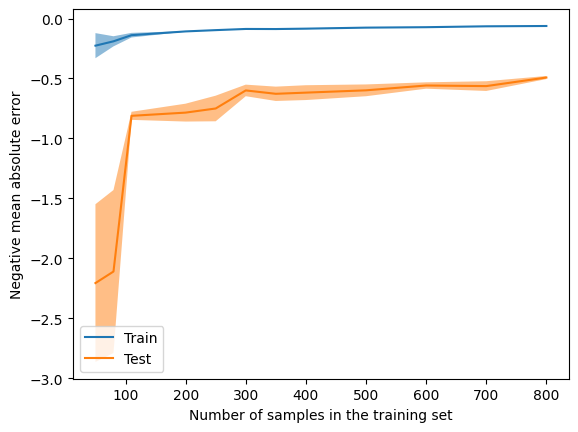

In [50]:
LearningCurveDisplay.from_estimator(
   best_lgbm, X, y, 
   train_sizes=[50, 80, 110, 200, 250, 300, 350, 400, 500, 600, 700, 800], 
   cv=5,
   scoring='neg_mean_absolute_error')


In [54]:
%store -d grid_result

UsageError: Can't delete variable 'grid_result'
